In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def mandelbrot_point(c, n_iterations, threshold=2):
    z = 0
    n = 0 
    for n in range(n_iterations):
        z = z**2 + c

        # threshold - usually 2
        if abs(z) > threshold:
            break
    return n

def mandelbrot(x_start, x_end, y_start, y_end, x_resolution, n_iterations, threshold):
    y_resolution = int(x_resolution*(y_end-y_start)/(x_end-x_start))
    points_to_draw = np.zeros((y_resolution, x_resolution))

    for x in range(x_resolution):
        for y in range(y_resolution):
            c = (x_end - x_start) * x/x_resolution + x_start + ((y_end - y_start) * -y/y_resolution + y_end)*1j
            # save threshold point as pixel value
            points_to_draw[y][x] = mandelbrot_point(c, n_iterations, threshold)

    plt.imshow(points_to_draw, cmap='hot', extent=(x_start, x_end, y_start, y_end))
    plt.show()

In [ ]:
mandelbrot(x_start = -2, 
           x_end = 1, 
           y_start = -1.5001, 
           y_end = 1.5, 
           x_resolution = 500, 
           n_iterations = 100,
           threshold = 2)

In [157]:
from numpy import random

def monte_carlo_mandelbrot(x_values, y_values, iterations):
    in_area = 0
    x_in_area = []
    y_in_area = []
    
    for i in range(len(x_values)):
        c = x_values[i] + y_values[i]*1j
        # print(i)

        if mandelbrot_point(c, iterations) == iterations - 1:
            x_in_area.append(x_values[i])
            y_in_area.append(y_values[i])
            in_area += 1

    return in_area, x_in_area, y_in_area

Area = 1.5203306759999997


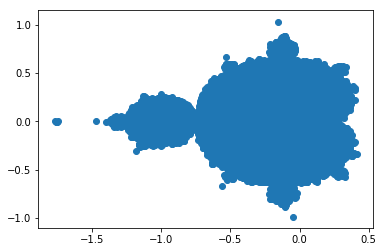

1.5203306759999997

In [158]:
def random_sampling(s, i, x_start, x_end, y_start, y_end):
    x_values = random.uniform(x_start, x_end, s)
    y_values = random.uniform(y_start, y_end, s)
    
    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)
    area = (x_end-x_start)*(y_end-y_start)*in_area/float(s)

    print(f"Area = {area}")
    plt.scatter(x_in_area, y_in_area)
    plt.show()

    return area

random_sampling(s = 50000,
                i = 1000,
                x_start = -2,
                x_end = 1,
                y_start = -1.5001,
                y_end = 1.5)

Area = 1.508090268


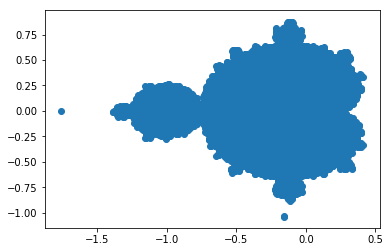

1.508090268

In [159]:
def latin_hypercube(s, i, x_start, x_end, y_start, y_end):
    x_bins = np.linspace(x_start, x_end, s+1)
    y_bins = np.linspace(y_start, y_end, s+1)
    x_values = []
    y_values = []

    for n in range(s):
        x_values.append(random.uniform(x_bins[n], x_bins[n+1]))
        y_values.append(random.uniform(y_bins[n], y_bins[n+1]))
    
    random.shuffle(x_values)
    random.shuffle(y_values)

    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)
    area = (x_end-x_start)*(y_end-y_start)*in_area/float(s)

    print(f"Area = {area}")
    plt.scatter(x_in_area, y_in_area)
    plt.show()

    return area
        
latin_hypercube(s = 50000,
                i = 1000,
                x_start = -2,
                x_end = 1,
                y_start = -1.5001,
                y_end = 1.5)

Area = 1.497109902


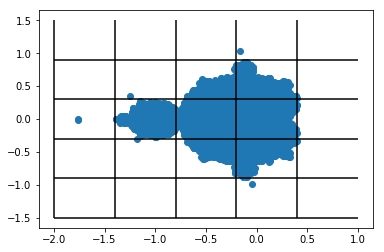

1.497109902

In [183]:
def orthogonal(s, i, divisions, x_start, x_end, y_start, y_end):
    if s % (divisions**2) != 0.0:
        print("Please make sure \"s\" is a multiple of \"divisions\"^2")
        return

    samples_per_block = int(s/(divisions**2))
    bins_per_block = samples_per_block*divisions

    x_bins = np.linspace(x_start, x_end, s+1)
    y_bins = np.linspace(y_start, y_end, s+1)

    x_blocks = []
    for block_x in range(divisions):
        x_blocks.append([])
        plt.vlines(x_bins[block_x*bins_per_block], y_start, y_end)
        for bin_x in range(bins_per_block):
            x_blocks[-1].append((x_bins[block_x*bins_per_block + bin_x], x_bins[block_x*bins_per_block + bin_x + 1]))
            # plt.vlines(x_bins[block_x*bins_per_block + bin_x], y_start, y_end, linestyles='dashed')
    x_blocks = [list(random.permutation(elem)) for elem in x_blocks]
    
    y_blocks = []
    for block_y in range(divisions):
        y_blocks.append([])
        plt.hlines(y_bins[block_y*bins_per_block], x_start, x_end)
        for bin_y in range(samples_per_block*divisions):
            y_blocks[-1].append((y_bins[block_y*bins_per_block + bin_y], y_bins[block_y*bins_per_block + bin_y + 1]))
            # plt.hlines(y_bins[block_y*bins_per_block + bin_y], x_start, x_end, linestyles='dashed')
    y_blocks = [list(random.permutation(elem)) for elem in y_blocks]

    x_values = []
    y_values = []

    for _ in range(samples_per_block):
        for b in range(divisions**2):
            x_bin = x_blocks[b%divisions].pop()
            y_bin = y_blocks[int(b/divisions)].pop()

            x_values.append(random.uniform(x_bin[0], x_bin[1]))
            y_values.append(random.uniform(y_bin[0], y_bin[1]))

    # plt.scatter(x_values, y_values)
    # plt.show()

    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)
    area = (x_end-x_start)*(y_end-y_start)*in_area/float(s)

    print(f"Area = {area}")
    plt.scatter(x_in_area, y_in_area)
    plt.show()

    return area
        
orthogonal(s = 50000,
           i = 1000,
           divisions = 5,
           x_start = -2,
           x_end = 1,
           y_start = -1.5001,
           y_end = 1.5)